**PROBLEM STATEMENT**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

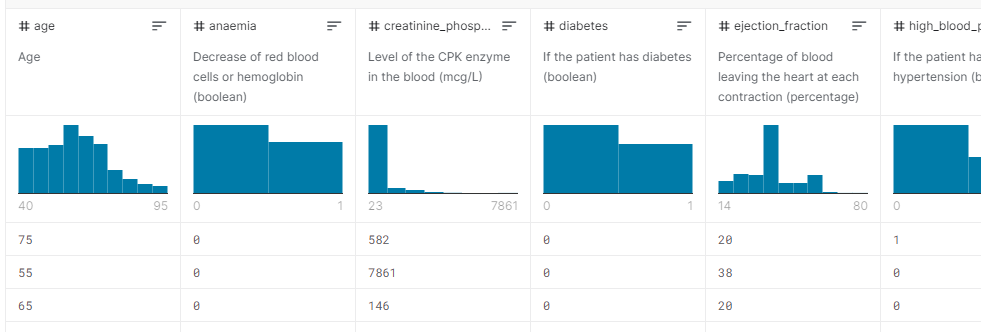

Dataset Link : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

#Logistic Regression Model

In [ ]:
#Installing required libraries
!pip install numpy pandas matplotlib seaborn --quiet
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 68 kB 5.8 MB/s 
     |████████████████████████████████| 166.7 MB 5.8 kB/s 
     |████████████████████████████████| 2.0 MB 41.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 


**Downloading the dataset**

Using "opendatasets" library to download our dataset from kaggle.

In [ ]:
import os
import opendatasets as od
import pandas as pd

In [ ]:
od.download('https://www.kaggle.com/andrewmvd/heart-failure-clinical-data')

100%|██████████| 3.97k/3.97k [00:00<00:00, 4.25MB/s]

In [ ]:
os.listdir('heart-failure-clinical-data')

['heart_failure_clinical_records_dataset.csv']

In [ ]:
raw_df = pd.read_csv('heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [ ]:
raw_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


This data has no null values. So no need to perform data cleaning.


**Creating Training, Validating and test datasets**

In [ ]:
!pip install scikit-learn --upgrade --quiet

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (179, 13)
val_df.shape : (60, 13)
test_df.shape : (60, 13)


**Input and Trget columns**

In [ ]:
input_cols = list(train_df.columns)[:-1]
target_col = 'DEATH_EVENT'

In [ ]:
input_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

In [ ]:
target_col

'DEATH_EVENT'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
!pip install numpy --quiet

In [ ]:
import numpy as np

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[numeric_cols].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,60.836128,0.430168,577.703911,0.379888,37.195531,0.357542,259031.588771,1.358436,136.770950,0.642458,0.296089
std,11.789422,0.496488,945.572038,0.486720,11.449488,0.480621,93813.337344,0.940952,3.863986,0.480621,0.457811
min,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,121.000000,0.000000,0.000000
25%,51.000000,0.000000,114.000000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000
50%,60.000000,0.000000,258.000000,0.000000,38.000000,0.000000,257000.000000,1.100000,137.000000,1.000000,0.000000
75%,69.000000,1.000000,582.000000,1.000000,40.000000,1.000000,304000.000000,1.400000,140.000000,1.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,621000.000000,9.000000,145.000000,1.000000,1.000000


In [ ]:
train_inputs[categorical_cols].nunique()

Series([], dtype: float64)

No categorical columns.

No need to impute numeric columns since they have no misssing or Nan values

**Scaling Numeric Coumns**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.378839,0.430168,0.070771,0.379888,0.351447,0.357542,0.283588,0.096453,0.679170,0.642458,0.296089
std,0.214353,0.496488,0.120639,0.486720,0.173477,0.480621,0.113727,0.105725,0.110400,0.480621,0.457811
min,0.000000,0.000000,0.000000,0.000000,0.015152,0.000000,0.026549,0.000000,0.228571,0.000000,0.000000
25%,0.200000,0.000000,0.011610,0.000000,0.242424,0.000000,0.224148,0.044944,0.600000,0.000000,0.000000
50%,0.363636,0.000000,0.029982,0.000000,0.363636,0.000000,0.281125,0.067416,0.685714,1.000000,0.000000
75%,0.527273,1.000000,0.071319,1.000000,0.393939,1.000000,0.338102,0.101124,0.771429,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.722391,0.955056,0.914286,1.000000,1.000000


**Training Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
print(model.coef_.tolist())

[[1.7081982463477134, 0.23291315073080546, 0.545110534175432, 0.22121612234551988, -2.0925645127994836, 0.40758463058340255, -0.29845091741190116, 1.928723814857879, -1.3375819950917622, -0.14392392474918042, 0.10093223204784842]]


In [ ]:
print(model.intercept_)

[-0.15917201]


**Model Prodictions and Evaluation**

In [ ]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [ ]:
train_preds = model.predict(X_train)
train_preds

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1])

In [ ]:
list(train_targets)

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1]

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.45437849, 0.54562151],
       [0.47184974, 0.52815026],
       [0.71422931, 0.28577069],
       [0.55617787, 0.44382213],
       [0.50848916, 0.49151084],
       [0.52150215, 0.47849785],
       [0.8300835 , 0.1699165 ],
       [0.82401438, 0.17598562],
       [0.80985651, 0.19014349],
       [0.78293352, 0.21706648],
       [0.47101063, 0.52898937],
       [0.59692799, 0.40307201],
       [0.74666312, 0.25333688],
       [0.47767608, 0.52232392],
       [0.84742112, 0.15257888],
       [0.69130024, 0.30869976],
       [0.59502964, 0.40497036],
       [0.71987072, 0.28012928],
       [0.67687319, 0.32312681],
       [0.72180775, 0.27819225],
       [0.90250274, 0.09749726],
       [0.60187319, 0.39812681],
       [0.84211994, 0.15788006],
       [0.65706133, 0.34293867],
       [0.79516114, 0.20483886],
       [0.64619929, 0.35380071],
       [0.72759175, 0.27240825],
       [0.51326672, 0.48673328],
       [0.32849585, 0.67150415],
       [0.77304479, 0.22695521],
       [0.

In [ ]:
model.classes_

array([0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.7094972067039106

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94117647, 0.05882353],
       [0.75      , 0.25      ]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 70.95%


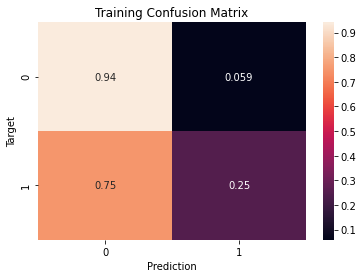

In [ ]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 83.33%


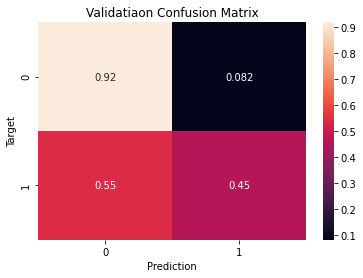

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 66.67%


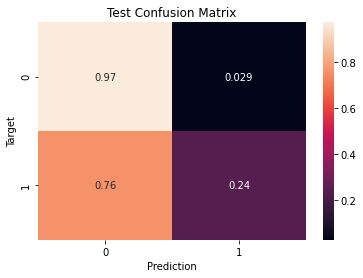

In [ ]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [ ]:
new_input = {'age': 1 ,
             'anaemia': 0,
             'creatinine_phosphokinase': 582,
             'diabetes': 0,
             'ejection_fraction': 20,
             'high_blood_pressure': 1,
             'platelets': 1265000.00,
             'serum_creatinine': 1.9,
             'serum_sodium': 130,
             'sex': 1,
             'smoking': 0}

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred

In [ ]:
predict_input(new_input)

0

In [ ]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    if pred==1 :
      print('Yes')
    else:
      print('No')
    return pred, prob

In [ ]:
predict_input(new_input)

No


(0, 0.8862526526525454)

In [ ]:
pickle.dump(regressor, open('model.pkl','wb'))

NameError: ignored

In [ ]:

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[2, 9, 6]]))